# Project: Investigate  No-show appointments Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I selected the second data set (no-show appointments ) .
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

> **dependent variable** : No-show column , that is the main point of that data set , it has one of two values : Yes ; if the patient not show the appointment , No ; if the patient show the appointment. ( I will convert them to numbers later ) .  
>
> **independent variables **: Gender , Age , SMS_received ,handcap,scholarship and Neighbourhood
>
> **questions** :

<ul>
<li><a href="#q1">َquestion 1: </a>what is the most features affect the paitent appointment (help us to predict if the patient will show up for their scheduled appointment or not) ?</li>
<li><a href="#q2">question 2: </a>after answer the first question , we can answer the question : how can we increase the percent of show up appointments ? </li>
</ul>




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


## General Properties
#### Loading data to data frame:

In [2]:
df = pd.read_csv('../dataset/appointments_data_set.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

### 1) drop unnecessary columns ; patiendId and AppointmentID that will not affect  the data 

In [6]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


### 2) clean columns names :
remove spaces , dashes and use small letters only :

In [8]:
df.rename(index=str,columns={'No-show':'no_show'} , inplace=True)

In [9]:
df.rename(columns =lambda x: x.strip().lower(),inplace=True )

### 3) handle null values (if founded) : 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


number instances = 110527  and the number of values of each column is also =110527 , that means no null values .

### 4) remove duplicated rows  

check if there is duplicated rows or no :

In [11]:
sum(df.duplicated()) 

635

there is 635 duplicate ! i will drop the duplicates as the following :

In [12]:
df.drop_duplicates(inplace=True) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
gender            109892 non-null object
scheduledday      109892 non-null object
appointmentday    109892 non-null object
age               109892 non-null int64
neighbourhood     109892 non-null object
scholarship       109892 non-null int64
hipertension      109892 non-null int64
diabetes          109892 non-null int64
alcoholism        109892 non-null int64
handcap           109892 non-null int64
sms_received      109892 non-null int64
no_show           109892 non-null object
dtypes: int64(7), object(5)
memory usage: 10.9+ MB


now we have 109892 instances after drop the duplicates .

### 5) ensure the data types 

#### 5.1) ensure date type fields

In [14]:
type(df['scheduledday'][0])

str

In [15]:
type(df['appointmentday'][0])

str

scheduledday and appointmentday are dates writen in string type ,so i will convert them to date :

In [16]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [17]:
type(df['scheduledday'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
type(df['appointmentday'][0])

pandas._libs.tslibs.timestamps.Timestamp

now , each of scheduledday and appointmentday are already in Timestamp type . 

#### 5.2) convert no_show column type from string ( yes , no ) to numeric( 0,1 ) to use that at statistics and plots . 

In [19]:
df.no_show[df['no_show']=='No']='0'
df.no_show[df['no_show']=='Yes']='1'

C:\Users\Rami\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rami\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# convert strings (0 and 1 ) to numpy.int64 to use them in statistics 
x=np.array(df['no_show'])
df['no_show']=np.asfarray(x,int)

I think that it is better to use the name of show rather than no_show cloumn ( it is more readable ) , so i will invert the name of column and it's values : 

In [21]:
df['show']=1-df['no_show']

In [22]:
#now there is no need for the (no_show) column so i will drop it :
df.drop('no_show',axis=1,inplace=True)

In [23]:
df.head(10)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1.0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1.0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1.0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1.0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1.0
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1.0
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0.0
7,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0.0
8,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,1.0
9,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1.0


In [24]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
gender            109892 non-null object
scheduledday      109892 non-null datetime64[ns]
appointmentday    109892 non-null datetime64[ns]
age               109892 non-null int64
neighbourhood     109892 non-null object
scholarship       109892 non-null int64
hipertension      109892 non-null int64
diabetes          109892 non-null int64
alcoholism        109892 non-null int64
handcap           109892 non-null int64
sms_received      109892 non-null int64
show              109892 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 15.9+ MB


In [25]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000
mean,37.089506,0.098287,0.197248,0.071825,0.030430,0.022131,0.322881,0.798912
std,23.121196,0.297704,0.397923,0.258199,0.171768,0.160878,0.467580,0.400816
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis



In [26]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000
mean,37.089506,0.098287,0.197248,0.071825,0.030430,0.022131,0.322881,0.798912
std,23.121196,0.297704,0.397923,0.258199,0.171768,0.160878,0.467580,0.400816
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [27]:
#create a masks for show and no_show to use them in visualisation and exploration of data
show=df['show']==1
no_show=df['show']==0

<a id='age'></a>
### 1) age

In [28]:
df.age[show].mean()

37.795680798232226

In [29]:
df.age[no_show].mean()

34.28391709656982

if we exclude not born childs , we get the following results :

In [30]:
not_born=df[df.age<=0]

In [31]:
not_born.age[show].count()

2895

In [32]:
not_born.show.mean()

0.8198810535259133

In [33]:
(not_born.groupby(['show']).count()/(not_born.shape[0]))['gender']

show
0.0    0.180119
1.0    0.819881
Name: gender, dtype: float64

In [34]:
only_born=df[df.age>0]

In [35]:
only_born.age[show].mean()

39.08450040636521

In [36]:
only_born.age[no_show].mean()

35.29987885565185

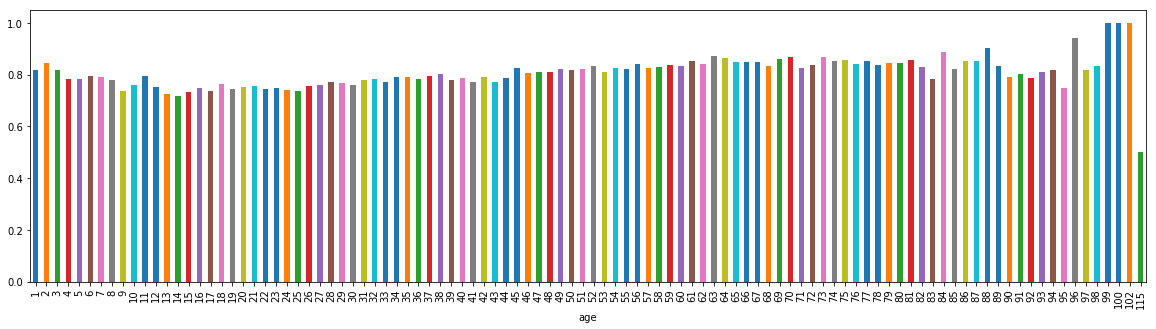

In [37]:
only_born.groupby('age').show.mean().plot(kind='bar',figsize=(20,5));

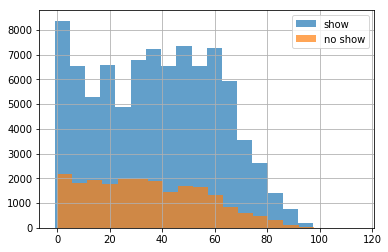

In [38]:
df.age[show].hist(alpha=0.7,bins=20,label='show')
df.age[no_show].hist(alpha=0.7,bins=20,label='no show')
plt.legend();

in general , show  appointment patients have higher age average. On other hand , not born childs (in minus age) or recently born ones have higher percent of show.

<a id='scholarship'></a>

### 2) scholarship

In [39]:
df.groupby('scholarship').show.mean()

scholarship
0    0.802787
1    0.763355
Name: show, dtype: float64

In [40]:
df.scholarship[show].mean()

0.09391302366904344

In [41]:
df.scholarship[no_show].mean()

0.11566657616073853

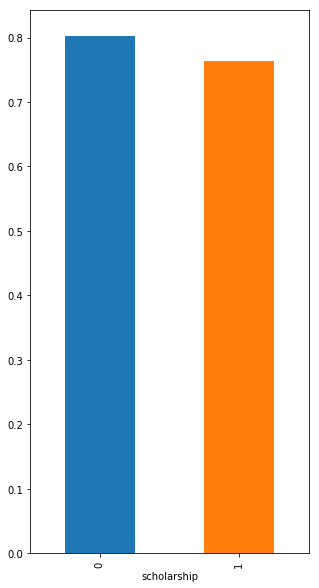

In [42]:
df.groupby('scholarship').show.mean().plot(kind='bar',figsize=(5,10));

patients have scholarship , have a little bit higher probabiltiy of no-show !

### 3) hipertension

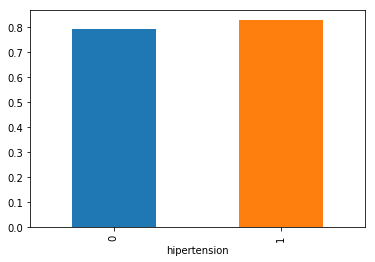

In [43]:
df.groupby('hipertension').show.mean().plot(kind='bar');

### 4) diabetes

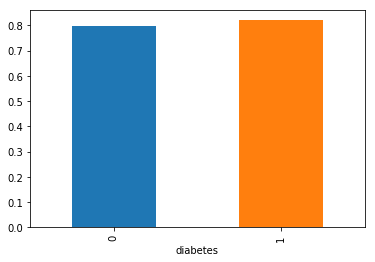

In [44]:
df.groupby('diabetes').show.mean().plot(kind='bar');

### 5) alcoholism

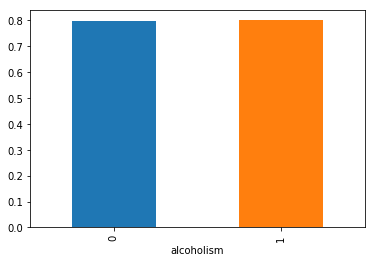

In [45]:
df.groupby('alcoholism').show.mean().plot(kind='bar');

as a result of the previous plots ; hipertension , diabetes, alcoholism have not affect the show-appointment .

<a id='handcap'></a>

### 6) handcap

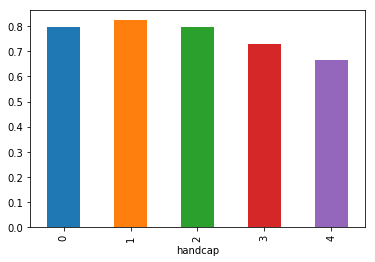

In [46]:
df.groupby('handcap').show.mean().plot(kind='bar');

patients in higher handcap has higher probability  of no-show.

<a id='sms_received'></a>

### 7) sms_received :

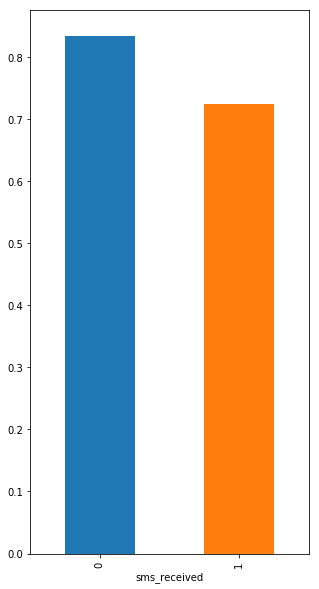

In [47]:
df.groupby('sms_received').show.mean().plot(kind='bar',figsize=(5,10));

patient who received sms message has a higher probability of no-show.

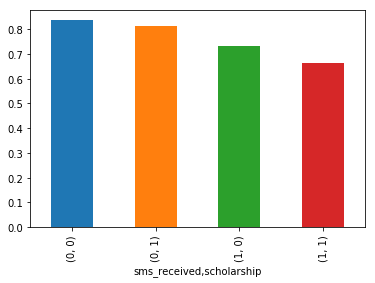

In [48]:
df.groupby(['sms_received','scholarship']).show.mean().plot(kind='bar');

when combined 'sms_received' and 'scholarship' , we got the same result of each one separately : recieve sms , have scholarship lead to no-show . 

### 8) gender :

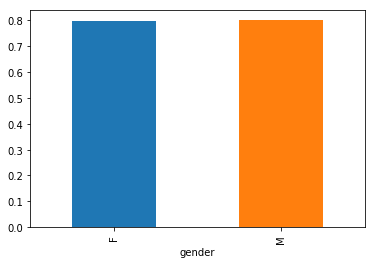

In [49]:
df.groupby('gender').show.mean().plot(kind='bar');

no effect for the gender , males and females nearly have the same averages of show and no show appointment .

### 9) neighbourhood 

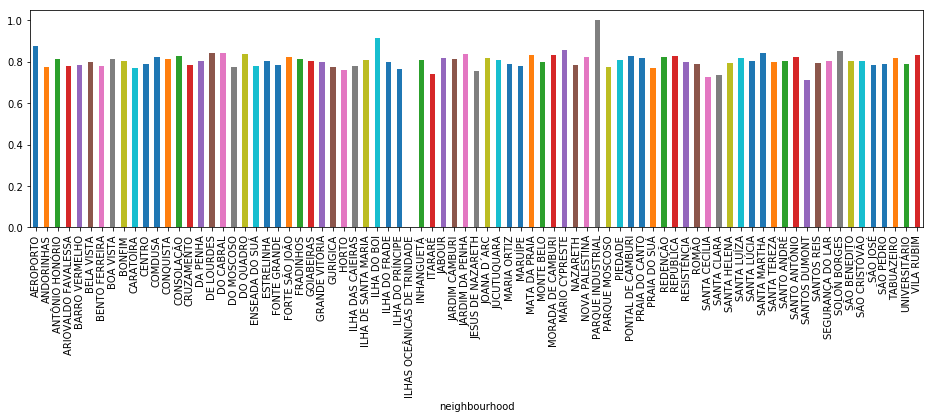

In [50]:
df.groupby('neighbourhood').show.mean().plot(kind='bar',figsize=(16,4));

'ILHAS OCEANICAS DE TRINDADE' has very high probabilty of no show . On other hand  ,each of 'AEROPORTO' , 'ILHA DO BOI' , 'PARQUE INDUSTRIAL' has a smaller probabilty of no show . 

<a id='period'></a>

### 10) period between appointmentday and scheduledday :

In [51]:
df['period']=(df['appointmentday']-df['scheduledday']).astype('timedelta64[h]')

In [52]:
df['period'].describe()

count    109892.000000
mean        232.016716
std         365.776116
min        -158.000000
25%          -9.000000
50%          82.000000
75%         342.000000
max        4285.000000
Name: period, dtype: float64

In [53]:
df.groupby(['show']).period.mean()

show
0.0    367.317178
1.0    197.961205
Name: period, dtype: float64

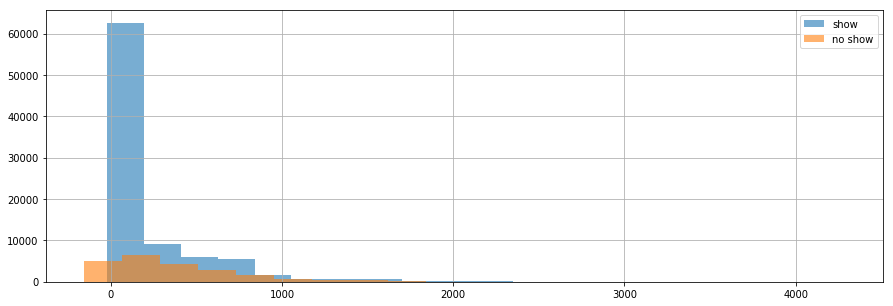

In [54]:
df['period'][show].hist(alpha=0.6,bins=20,label='show')
df['period'][no_show].hist(alpha=0.6,bins=20,label='no show',figsize=(15,5))
plt.legend();

zoom in to the previous hist:

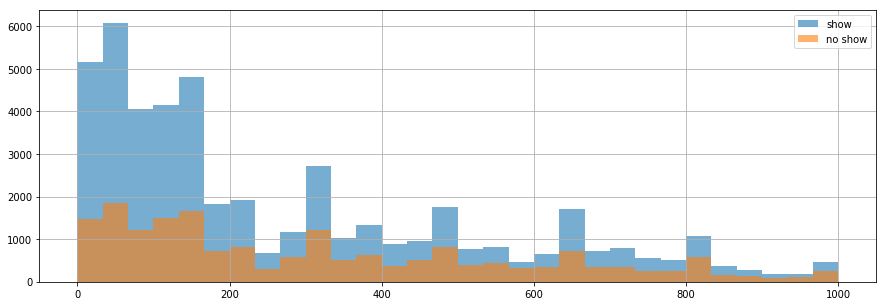

In [55]:
df['period'][show].hist(alpha=0.6,bins=30,label='show',range=(0,1000))
df['period'][no_show].hist(alpha=0.6,bins=30,label='no show',figsize=(15,5),range=(0,1000))
plt.legend();

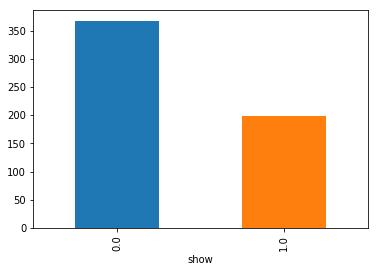

In [56]:
df.groupby(['show']).period.mean().plot(kind='bar');

most of paitients have a period (appointmentday to scheduledday) from 0 to 200 hours and most of them will show their appointment .

<a id='month'></a>
### 11) month of appintment:

In [57]:
#extract the month to use it in grouping
df['month']=df['scheduledday'].dt.month 

In [58]:
#to get number of appointments in each month
df.groupby(['month']).show.count()

month
1        60
2       280
3      3579
4     25120
5     67074
6     13717
11        1
12       61
Name: show, dtype: int64

July,August,September,October months don't have any appointment ! and November month has only one appointment , most of appointments are on May . Go bit deeper : 

In [59]:
df.groupby(['month','show'])['gender'].count()

month  show
1      0.0        18
       1.0        42
2      0.0        81
       1.0       199
3      0.0      1180
       1.0      2399
4      0.0      7756
       1.0     17364
5      0.0     11665
       1.0     55409
6      0.0      1379
       1.0     12338
11     1.0         1
12     0.0        19
       1.0        42
Name: gender, dtype: int64

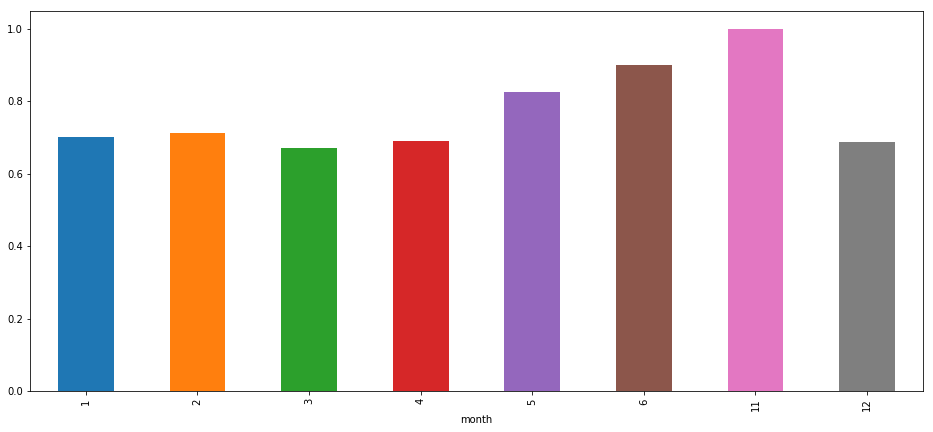

In [60]:
df.groupby(['month']).show.mean().plot(kind='bar',figsize=(16,7));

appointments of January ,Fabruary , March , April and December appointments have a higher probability of no-show appointments than other months . May , June appointments have lower probability of no-show appointments . And we can't determine for the other months because July,August,September,October months don't have any appointment ! and November month has only one appointment .

<a id='q1'></a>
### Research Question 1 : what is the most features(factors) affect the paitent appointment (help us to predict if the patient will show up for their scheduled appointment or not) ?

as a result of the previous visualization , the following features have the most effect of show appointment or not :<ul>
<li><a href="#age">age</a></li>
<li><a href="#scholarship">scholarship</a></li>
<li><a href="#sms_received">sms_received</a></li>
<li><a href="#handcap">handcap</a></li>
<li><a href="#month">month</a></li>
<li><a href="#period">period </a>( number of hours between appointmentday and scheduledday)</li>
 

</ul>
( explanation of each feature in previous steps )

<a id='q2'></a>
### Research Question 2  : how can we increase the percent of show up appointments ?

as a result of the previous question , we can increase the show appointments by working with features that has the most effect on show appointment :
<ul>  
    <li>
        age : concentrate on young patients because they have higher probability of no show appointment .
    </li>
    <li>
        scholarship : we can't say : ' don't provide scholarship to patients ' because they got a good benifit from that . So , concentrate on patients have scholarship . 
    </li>
    <li>sms_received : patients received sms have higher probability to don't show appointment! so I suggest to include notification to show their appointment with the sms . 
    </li>
    <li>
    handcap : patients with high handcap classes ( 3 and 4 ) have higher  probability to don't show appointment . So , concentrate on theis classes or create an easy way for them to show their appointment.
    </li>
    <li>
        month : appointments of January ,Fabruary , March , April and December have a higher probability of no-show appointments than other months , so concentrate on appointments of theis months to show their appointments. 
    </li>
    <li>
    period : appointments with short hours period (up to 200 hour) has a low probabilty of don't show .However , appointments with long hours period (near to 370 hour) has a high probabilty of don't show . So i suggest to limit this period .
    </li>
</ul>
* I meant by concentration on specific type of patients by give them special care and notify them every while until they show their appointment .


<a id='conclusions'></a>
## Conclusions


the features that have the most effect of show appointment or not are :
<ul>  
    <li>        age : patients who show their appointments have age average of 37.795 years and the age average of don't show appointment patients equals 34.28 years . However , not born patients (minus age ) have low probability of no show appointment (18% only) , so i excluded this group and get the following results : 39.08 years is average of patients show appointment and 35.29 years is the average of patients don't show appointment. In general , we can say that younger patients have higher probability of don't show appointment except not born childs and early borned ones .
    </li>
    <li>
        scholarship : patients with scholarship have higher probability of don't show appointment. Patients with scholarship have 76.3% probabilty of show , but patients without scholarship have 80.03% probabilty of show.
    </li>
    <li>
        sms_received : patients received sms have higher probability to don't show appointment! 
    </li>
    <li>
    handcap : patients with high handcap classes ( 3 and 4 ) have higher probability to don't show appointment .
    </li>
    <li>
        month : appointments of January ,Fabruary , March , April and December have a higher probability of no-show appointments than other months , so concentrate on appointments of theis months to show their appointments. 
    </li>
     <li>
    period ( number of hours between appointmentday and scheduledday) : show appointments have a period average of about 198 hour (small period ). However , don't show appointments have a period average of about 367 hour (high period ). So , we can say that appointments with high period , have higher probabilty of don't show appointment.
    </li>
</ul>

In [61]:
from subprocess import call
call(['python','-m','nbconvert','project3.iynp'])

4294967295